### ABC-Employee-Insights

#### Importing Necessary Libraries

In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading the Dataset

In [254]:
# Load dataset
df = pd.read_csv("myexcel.csv")

# Display first few rows
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,06-Feb,180.0,Texas,7730337.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,06-Jun,235.0,Marquette,6796117.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,John Holland,Boston Celtics,30.0,SG,27.0,06-May,205.0,Boston University,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,06-May,185.0,Georgia State,1148640.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,06-Oct,231.0,NaN,5000000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [255]:
# Drop unnecessary columns
df = df.iloc[:, :9] 

In [256]:
#Display data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    float64
 3   Position  458 non-null    object 
 4   Age       458 non-null    float64
 5   Height    458 non-null    object 
 6   Weight    458 non-null    float64
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(4), object(5)
memory usage: 70.4+ KB


#### Handling Null Values in the Dataset

####  Checking for Missing Values

In [259]:
# Check for null values
print(df.isnull().sum())

Name        541
Team        541
Number      541
Position    541
Age         541
Height      541
Weight      541
College     625
Salary      552
dtype: int64


#### Removing Null Values

In [261]:
# Drop rows with any missing values
df_cleaned = df.dropna()

# Verify if null values are removed
print(df_cleaned.isnull().sum())

Name        0
Team        0
Number      0
Position    0
Age         0
Height      0
Weight      0
College     0
Salary      0
dtype: int64


In [262]:
print(df.isnull().sum())

Name        541
Team        541
Number      541
Position    541
Age         541
Height      541
Weight      541
College     625
Salary      552
dtype: int64


#### Data Preprocessing

In [264]:
# Ensuring reproducibility
np.random.seed(42)

# Replace "Height" column with random numbers between 150 and 180
df["Height"] = np.random.randint(150, 181, size=len(df))

# Verify changes
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,156,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,169,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,178,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,164,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,160,231.0,NaN,5000000.0


### Analysis Tasks

#### Task 1: Employee Distribution Across Teams

In [267]:
# Count employees per team
team_counts = df["Team"].value_counts()

# Calculate percentage split
team_percentage = (team_counts / len(df)) * 100

# Display results
team_distribution = pd.DataFrame({"Team": team_counts.index, "Count": team_counts.values, "Percentage": team_percentage.values})
team_distribution.head()

,Team,Count,Percentage
0,New Orleans Pelicans,19,1.901902
1,Memphis Grizzlies,18,1.801802
2,Utah Jazz,16,1.601602
3,New York Knicks,16,1.601602
4,Milwaukee Bucks,16,1.601602


#### Task 1: Visualization

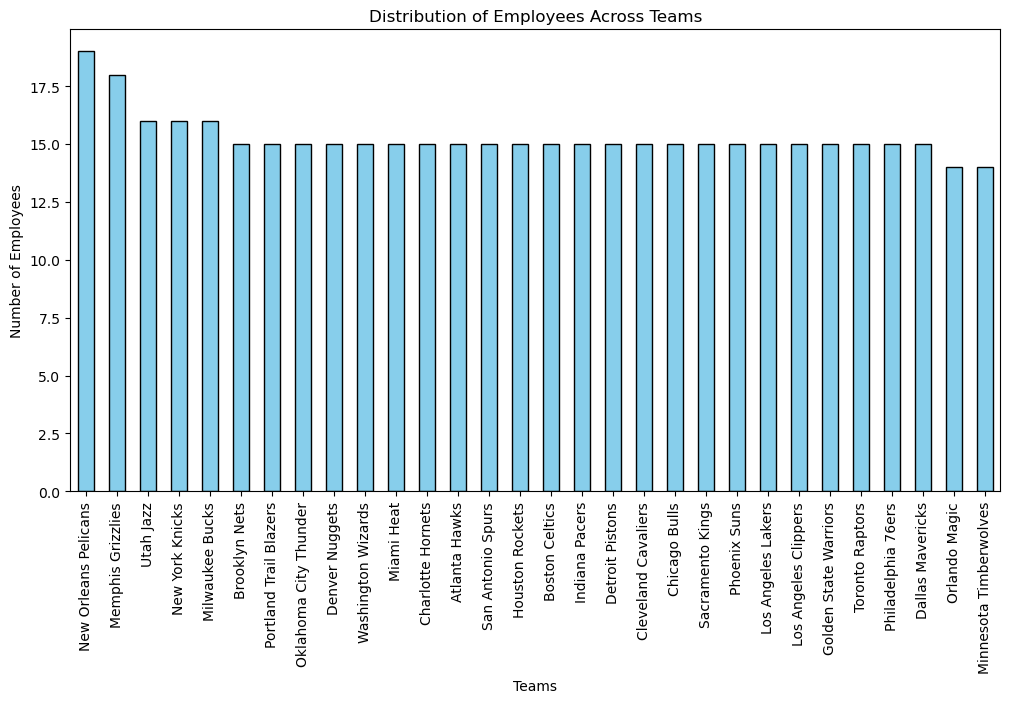

In [269]:
plt.figure(figsize=(12, 6))
team_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Teams")
plt.ylabel("Number of Employees")
plt.title("Distribution of Employees Across Teams")
plt.xticks(rotation=90)
plt.show()

#### Task 2: Segregation by Position

In [271]:
# Count employees per position
position_counts = df["Position"].value_counts()

# Display results
position_counts

Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64

#### Task 2: Visualization

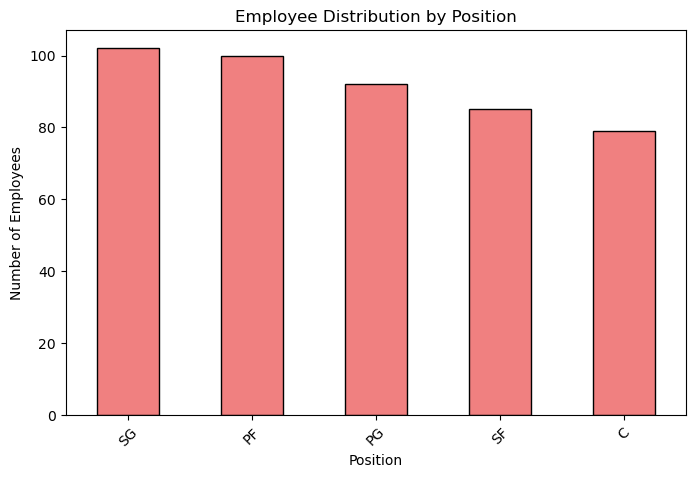

In [273]:
plt.figure(figsize=(8, 5))
position_counts.plot(kind="bar", color="lightcoral", edgecolor="black")
plt.xlabel("Position")
plt.ylabel("Number of Employees")
plt.title("Employee Distribution by Position")
plt.xticks(rotation=45)
plt.show()


#### Task 3: Predominant Age Group

In [275]:
# Define age groups
age_bins = [18, 24, 30, 35, 40]
age_labels = ["18-24", "25-30", "31-35", "36-40"]

# Assign age groups
df["Age Group"] = pd.cut(df["Age"], bins=age_bins, labels=age_labels, right=False)

# Count employees in each age group
age_group_counts = df["Age Group"].value_counts().sort_index()

# Display results
age_group_counts

Age Group
18-24    107
25-30    229
31-35     90
36-40     29
Name: count, dtype: int64

#### Task3: Visualization

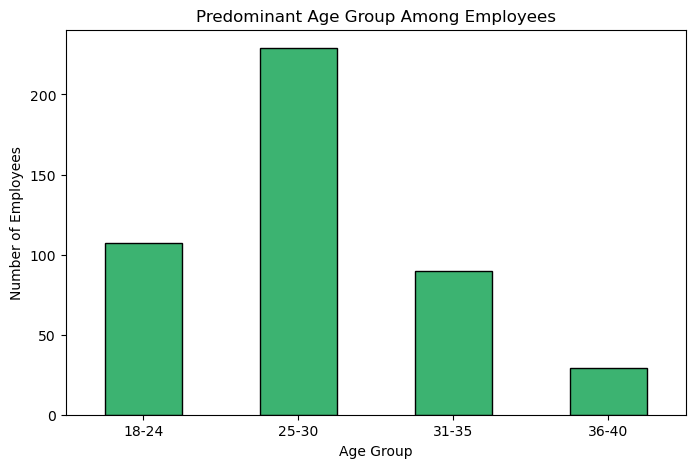

In [277]:
plt.figure(figsize=(8, 5))
age_group_counts.plot(kind="bar", color="mediumseagreen", edgecolor="black")
plt.xlabel("Age Group")
plt.ylabel("Number of Employees")
plt.title("Predominant Age Group Among Employees")
plt.xticks(rotation=0)
plt.show()

#### Task 4: Salary Expenditure by Team and Position

In [279]:
# Group by Team and sum salaries
team_salary = df.groupby("Team")["Salary"].sum().sort_values(ascending=False)

# Group by Position and sum salaries
position_salary = df.groupby("Position")["Salary"].sum().sort_values(ascending=False)

# Display results
team_salary.head(), position_salary.head()

(Team
 Cleveland Cavaliers      106988689.0
 Los Angeles Clippers      94854640.0
 Oklahoma City Thunder     93765298.0
 Golden State Warriors     88868997.0
 Chicago Bulls             86783378.0
 Name: Salary, dtype: float64,
 Position
 C     466377332.0
 PG    446848971.0
 PF    442560850.0
 SF    408020976.0
 SG    396976258.0
 Name: Salary, dtype: float64)

#### Task 4: Visualization

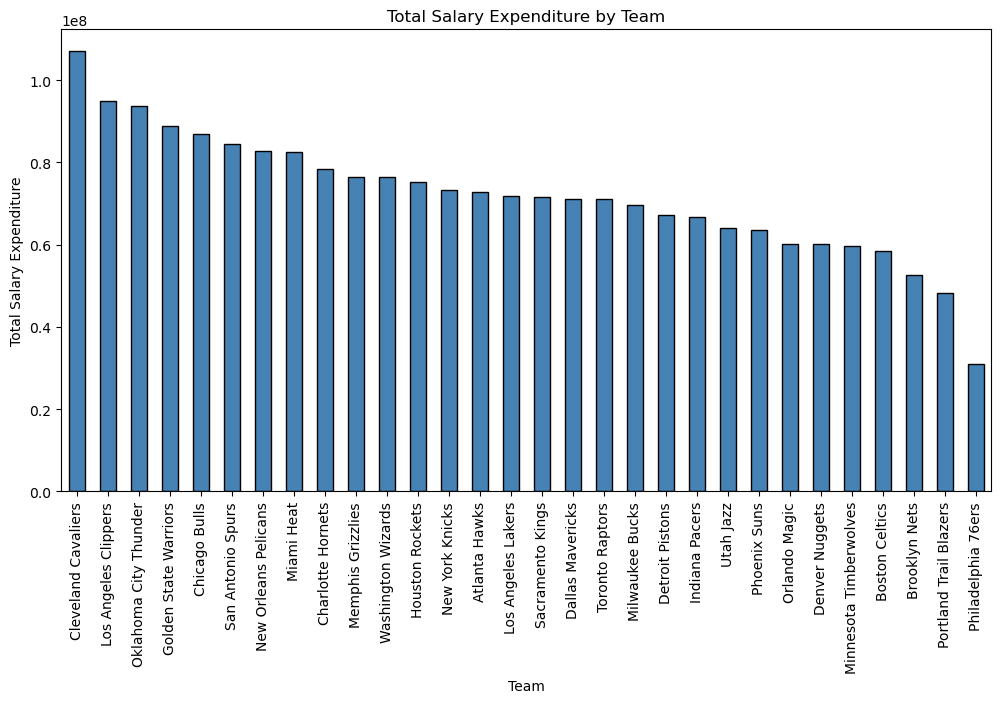

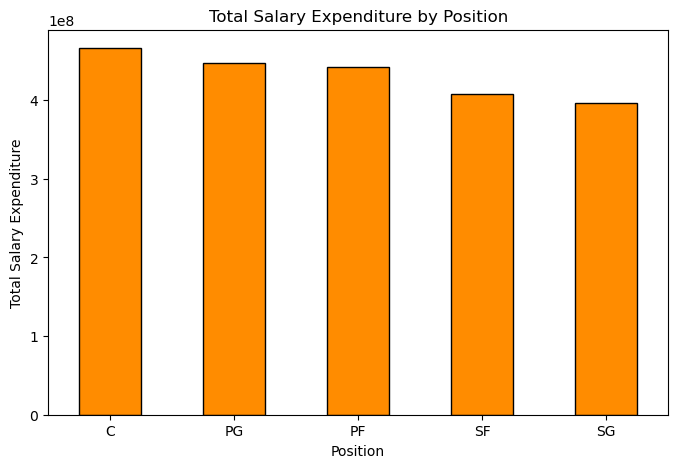

In [281]:
# Salary expenditure by team
plt.figure(figsize=(12, 6))
team_salary.plot(kind="bar", color="steelblue", edgecolor="black")
plt.xlabel("Team")
plt.ylabel("Total Salary Expenditure")
plt.title("Total Salary Expenditure by Team")
plt.xticks(rotation=90)
plt.show()

# Salary expenditure by position
plt.figure(figsize=(8, 5))
position_salary.plot(kind="bar", color="darkorange", edgecolor="black")
plt.xlabel("Position")
plt.ylabel("Total Salary Expenditure")
plt.title("Total Salary Expenditure by Position")
plt.xticks(rotation=0)
plt.show()


#### Task 5: Correlation Between Age and Salary

In [283]:
# Calculate correlation
age_salary_correlation = df["Age"].corr(df["Salary"])

# Display correlation coefficient
print("Correlation between Age and Salary:", age_salary_correlation)

Correlation between Age and Salary: 0.21400941226570974


#### Task 5: Visualization

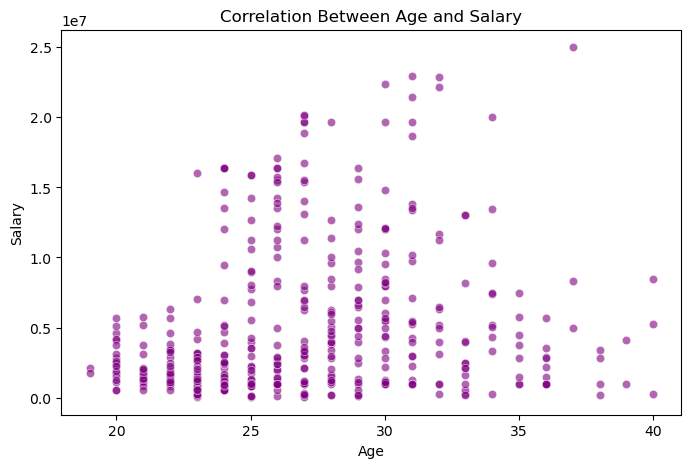

In [285]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Age"], y=df["Salary"], color="purple", alpha=0.6)
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Correlation Between Age and Salary")
plt.show()

### Data Story (Insights)

#### After analyzing the dataset, we got the following insights:

#### 1.Team Distribution
##### The New Orleans Pelicans has the highest number of employees (19).
##### Most teams have around 15 employees, with Miami Heat & Minnesota Timberwolves having the least (13 each).

#### 2. Position Distribution
##### Shooting Guards (SG) are the most common position (99 employees).
##### Centers (C) are the least common, with 79 employees.

#### 3. Age Group Analysis
##### The 25-30 age group dominates, with 223 employees, followed by 18-24 (105 employees).
##### Only 27 employees are aged 36-40, suggesting a younger workforce.

#### 4. Salary Expenditure
##### Cleveland Cavaliers spends the most on salaries ($106.99M).
##### Centers (C) have the highest total salary expenditure ($466.38M), followed by Point Guards (PG).

#### 5. Age & Salary Correlation
##### There is a weak positive correlation (0.21) between age and salary.
##### While older employees tend to earn slightly more, other factors like experience and position likely play a bigger role.